In [1]:
from keras.models import Sequential 
from keras.layers import Dense
import pandas as pd
import numpy as np

Using TensorFlow backend.


In [2]:
df = pd.read_csv('pima-indians-diabetes.data.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
y = df[8]
X = df.drop(8, axis = 1)

In [4]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
scalar.fit(X)
X = scalar.transform(X)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [6]:
X_train.shape

(537, 8)

Architecture:

Input Layer: 10 nodes - relu activation

Hidden Layer 1: 50 nodes - relu activation

Hidden Layer 2: 10 nodes - relu activation

Hidden Layer 3: 5 nodes - relu activation

Ouput Layer: 1 node - sigmoid activation

In [7]:
model = Sequential()
model.add(Dense(10, input_dim=8, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [8]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                90        
_________________________________________________________________
dense_2 (Dense)              (None, 50)                550       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 6         
Total params: 1,211
Trainable params: 1,211
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.fit(X_train, y_train, epochs=300, batch_size  =10)

- 0s 292us/step - loss: 0.3828 - accuracy: 0.8194
Epoch 111/300
537/537 [==============================] - 0s 328us/step - loss: 0.3918 - accuracy: 0.7989
Epoch 112/300
537/537 [==============================] - 0s 310us/step - loss: 0.3899 - accuracy: 0.8212
Epoch 113/300
537/537 [==============================] - 0s 316us/step - loss: 0.3852 - accuracy: 0.8250
Epoch 114/300
537/537 [==============================] - 0s 318us/step - loss: 0.3789 - accuracy: 0.8212
Epoch 115/300
537/537 [==============================] - 0s 300us/step - loss: 0.3820 - accuracy: 0.8268
Epoch 116/300
537/537 [==============================] - 0s 290us/step - loss: 0.3855 - accuracy: 0.8194
Epoch 117/300
537/537 [==============================] - 0s 420us/step - loss: 0.3855 - accuracy: 0.8194
Epoch 118/300
537/537 [==============================] - 0s 291us/step - loss: 0.3810 - accuracy: 0.8231
Epoch 119/300
537/537 [==============================] - 0s 296us/step - loss: 0.3847 - accuracy: 0.8250
Epoch

In [11]:
model.predict_classes(X_test)

array([[1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
    

In [12]:
model.evaluate(X_test, y_test)[1]

231/231 [==============================] - 0s 762us/step


0.7662337422370911

In [13]:
model.history

Text(0, 0.5, 'loss')

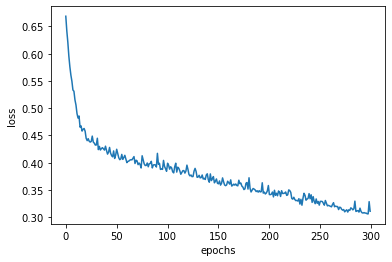

In [14]:
#plotting loss against no. of epochs
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(model.history.epoch, model.history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')

Text(0, 0.5, 'accuracy')

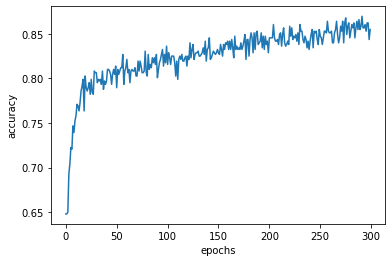

In [16]:
plt.plot(model.history.epoch, model.history.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')

In [17]:
Xnew = np.array([[1,85,66,29,0,26.6,0.351,31]])
Xnew = scalar.transform(Xnew)
ynew = model.predict_classes(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0],ynew[0]))

X=[0.05882353 0.42713568 0.54098361 0.29292929 0.         0.39642325
 0.11656704 0.16666667], Predicted=[0]


# Save Pre-trained Model

In [22]:
model.save("NN_model.h5")
print("Saved model to disk")

Saved model to disk


In [23]:
from keras.models import load_model
saved_model = load_model('NN_model.h5')

In [24]:
prediction = saved_model.predict_classes(Xnew)
print(prediction[0])

[0]
